In [4]:
#%matplotlib inline

In [19]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
image1 = '../Sample1/CT0069.tif'

In [11]:
import os
from PIL import Image

In [14]:
im = Image.open(image1)

In [15]:
im.show()

In [17]:
print(im)

<PIL.TiffImagePlugin.TiffImageFile image mode=I;16 size=292x292 at 0x10A53D278>


In [20]:
imarray = np.array(im)

In [21]:
print(imarray)

[[8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]
 ..., 
 [8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]]


In [23]:
os.path.isfile(image1)

True

In [24]:
image = mpimg.imread(image1)

In [25]:
print(image.max())
print(image.min())

43799
0


In [26]:
print(image)

[[8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]
 ..., 
 [8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]
 [8141 8141 8141 ..., 8141 8141 8141]]


In [31]:
plt.imshow(image, cmap=plt.cm.gray)
plt.colorbar()
plt.title("TIFF image")
plt.show()

In [32]:
from skimage import exposure
import skimage

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5));
ax_img, ax_hist = axes;
ax_img.imshow(image, cmap=plt.cm.gray)
# ax_img.set_axis_off();
histo = skimage.exposure.histogram(image, nbins=256)
ax_hist.plot(histo[1], histo[0])
ax_hist.set_xlim(0.05, 0.3)


(0.05, 0.3)

In [231]:
import math
def gaussian(a, b, c, range_x):
    ''' a is the height
        b is the position of the center
        c controls the width of the bell
        https://en.wikipedia.org/wiki/Gaussian_function
    '''
    result = []
    for value in range_x:
        result.append(a*math.exp(-((value-b)**2)/(2*c**2)))
    return result
    

In [232]:
def lorentzian(a, b, c, range_x):
    ''' a is the height
        b is the position of the center
        c is the width of the peak
        http://mathworld.wolfram.com/LorentzianFunction.html
    '''
    result = []
    for value in range_x:
        _value = a*(1/np.pi)*(c/2)/((value-b)**2+(c/2)**2)
        result.append(_value)
    return result

In [234]:
print(gaussian(1,2,3,range(1,10)))

[0.9459594689067654, 1.0, 0.9459594689067654, 0.8007374029168081, 0.6065306597126334, 0.41111229050718745, 0.24935220877729622, 0.1353352832366127, 0.06572852861653047]


In [235]:
import matplotlib
matplotlib.use('nbagg')

/Users/j35/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


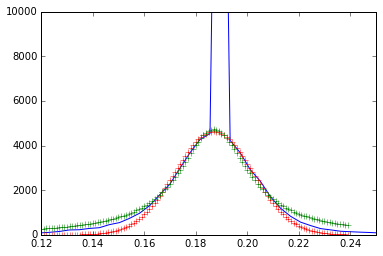

In [236]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(histo[1], histo[0])
ax.set_xlim([0.12, 0.25])
ax.set_ylim([0, 10000])

x = np.arange(0.12, 0.24, 0.001)

a = 4630; b = 0.187; c = 0.015
ax.plot(x, gaussian(a, b, c, x),'r+')

a = 245; b = 0.187; c = 0.033
ax.plot(x, lorentzian(a, b, c, x), 'g+')

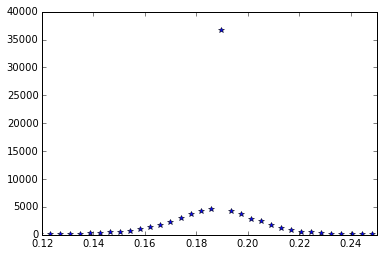

In [206]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(histo[1], histo[0], '*')
ax.set_xlim([0.12, 0.25])
#ax.set_ylim([0, 10000])

x = np.arange(0.12, 0.24, 0.001)

#a = 4630; b = 0.187; c = 0.015
#ax.plot(x, gaussian(a, b, c, x),'r+')

#a = 245; b = 0.187; c = 0.033
#ax.plot(x, lorentzian(a, b, c, x), 'g+')

In [237]:
y_axis = histo[0]
x_axis = histo[1]
print('y_axis max is at index: %d and a value of: %d' %(y_axis.argmax(), y_axis[y_axis.argmax()]))
print('x_axis value of max intensity is %f' %x_axis[y_axis.argmax()])

y_axis max is at index: 48 and a value of: 36663
x_axis value of max intensity is 0.189453


In [238]:
image

array([[ 0.1882353,  0.1882353,  0.1882353, ...,  0.1882353,  0.1882353,
         0.1882353],
       [ 0.1882353,  0.1882353,  0.1882353, ...,  0.1882353,  0.1882353,
         0.1882353],
       [ 0.1882353,  0.1882353,  0.1882353, ...,  0.1882353,  0.1882353,
         0.1882353],
       ..., 
       [ 0.1882353,  0.1882353,  0.1882353, ...,  0.1882353,  0.1882353,
         0.1882353],
       [ 0.1882353,  0.1882353,  0.1882353, ...,  0.1882353,  0.1882353,
         0.1882353],
       [ 0.1882353,  0.1882353,  0.1882353, ...,  0.1882353,  0.1882353,
         0.1882353]], dtype=float32)

In [245]:
from PIL import Image

ImportError: dlopen(/Users/j35/anaconda/lib/python3.4/site-packages/PIL/_imaging.so, 2): Library not loaded: libjpeg.8.dylib
  Referenced from: /Users/j35/anaconda/lib/python3.4/site-packages/PIL/_imaging.so
  Reason: image not found

ImportError: dlopen(/Users/j35/anaconda/lib/python3.4/site-packages/PIL/_imaging.so, 2): Library not loaded: libjpeg.8.dylib
  Referenced from: /Users/j35/anaconda/lib/python3.4/site-packages/PIL/_imaging.so
  Reason: image not found